# Introduction to Data Science CA1:
## Group Members:
### Reza Chehreghani: 810101401
### Mohsen Piri: 220799055
### Amirreza Kaffashan: 810899064

# Part 1: Monte Carlo Simulation

## 1-1: Pi Calculation

The idea for estimating Pi is to calculate the ratio of number of points which reside in the circle to the total points generated in the square and the reason is the relationship between area of a square and a circle inscribed by the square.

In [9]:
import random

num_trials = 1000
inside_circle = 0
total_points = 0

for _ in range(num_trials ** 2):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)

    distance_from_origin = x ** 2 + y ** 2

    if distance_from_origin <= 1:
        inside_circle += 1

    total_points += 1

pi_estimate = 4 * inside_circle / total_points

print("Estimated value of Pi after", num_trials, "trials:", pi_estimate)


Estimated value of Pi after 1000 trials: 3.1436


We checked if (X^2 + Y^2) for a single point is less than 1 it means it fell inside the circle and vice versa.

## 1-2: Mensch Game

First of all, we define a function to roll the dice. It return randomly integer in range [0, 6].

In [10]:
import random
def roll_dice():
    return random.randint(1, 6)

In this implementation, we number the fields from 1 to 36.

Now we difine some constant. "out" will be -1, and "start" will be 0, 9, 18, 27 for 1st, 2nd, 3rd, 4th player respectively. Actually, we define the "start" as 1 less than the first field for simplicity of calculations.

In [11]:
OUT = -1
START_POS = [9 * i for i in range(4)]

This function checks that does the piece finish the circle or not. As you know, each piece after a complete circle must go the its own "home" fields.

Becaue it can't distinguish first move from last move, first of all we check it.
In conditons the point is that circle doesn't have start and end, but numbers have, so we must check it for 1st player separately.

In [12]:
def does_pass_home(players, i, next_pos, is_first_move):
    if is_first_move:
        return False

    if i == 0:
        if next_pos < players[i]:
            return True
        
    if players[i] <= START_POS[i] and next_pos > START_POS[i]:
        return True
    
    return False

This is our main function. It moves pieces on each player's turn and check if it has gone "home" or not.

first of all, roll the dice. If player was "out" and dice equals to 6, puts it on "start" and makes move again, but if dice was opposite to 6, do nothing.

otherwise, calculate next position base on the dice number (again, circle doesn't have start and end, but numbers have). If it passed "home", check if it can enter it. If can game is over and will be finished.

If it didn't pass the "home", then checks if it can throw out other players. At last moves that piece.

In [13]:
def make_move(players, i, is_first_move=False):
    dice = roll_dice()

    if players[i] == OUT:
        if dice == 6:
            players[i] = START_POS[i]
            return make_move(players, i, True)
        return False

    next_pos = (players[i] + dice - 1) % 36 + 1

    if does_pass_home(players, i, next_pos, is_first_move):
        home_option = next_pos - START_POS[i]
        # print(home_option, next_pos, START_POS[i], dice)
        if home_option == 1:
            return True
        if dice == 6:
            return make_move(players, i)
        return False
    
    if next_pos in players:
        index_thrown_out = players.index(next_pos)
        players[index_thrown_out] = OUT
    
    players[i] = next_pos
    
    if  dice == 6:
        return make_move(players, i)
    return False

This function runs the mensch game. First, puts the players "out", then move theis pieces in their turn repectively until game is overed.

In [14]:
def play_mensch():
    players = [OUT, OUT, OUT, OUT]

    i = -1
    is_over = False
    while not is_over:
        i = (i + 1)% 4
        is_over = make_move(players, i)

    return i

We play the game many times (Monte Carlo Simulation) and save their result in a list.

In [15]:
NUM_OF_SETS = 200000
winners = [-1 for _ in range(NUM_OF_SETS)]
for i in range(NUM_OF_SETS):
    winners[i] = play_mensch()

At last calculate the probability of winning for each player.

In [16]:
import numpy as np
pmf_win = np.histogram(winners, bins=[0, 1, 2, 3, 4], density=True)[0]
print('Probability of winning the 1st player:', '{:.2f}'.format(pmf_win[0]))
print('Probability of winning the 2nd player:', '{:.2f}'.format(pmf_win[1]))
print('Probability of winning the 3rd player:', '{:.2f}'.format(pmf_win[2]))
print('Probability of winning the 4th player:', '{:.2f}'.format(pmf_win[3]))

Probability of winning the 1st player: 0.27
Probability of winning the 2nd player: 0.26
Probability of winning the 3rd player: 0.24
Probability of winning the 4th player: 0.23


### Q1: Read a little bit about the applications of Monte Carlo Simulation in real life. What are some of these applications?

#### Business

Business leaders use Monte Carlo methods to project realistic scenarios when making decisions. For example, a marketer needs to decide whether it's feasible to increase the advertising budget for an online yoga course. They could use the Monte Carlo mathematical model on uncertain factors or variables such as the following:

    Subscription fee
    Advertising cost
    Sign-up rate 
    Retention 

The simulation would then predict the impact of changes on these factors to indicate whether the decision is profitable. 

#### Finance

Financial analysts often make long-term forecasts on stock prices and then advise their clients of appropriate strategies. While doing so, they must consider market factors that could cause drastic changes to the investment value. As a result, they use the Monte Carlo simulation to predict probable outcomes to support their strategies.

#### Online gaming

Strict regulations govern the online gaming and betting industry. Customers expect gaming software to be fair and mimic the characteristics of its physical counterpart. Therefore, game programmers use the Monte Carlo method to simulate results and ensure a fair-play experience.

#### Engineering

Engineers must ensure the reliability and robustness of every product and system they create before making it available to the public. They use Monte Carlo methods to simulate a product’s probable failure rate based on existing variables. For example, mechanical engineers use the Monte Carlo simulation to estimate the durability of an engine when it operates in various conditions.

# Part 2: Central Limit Theorem

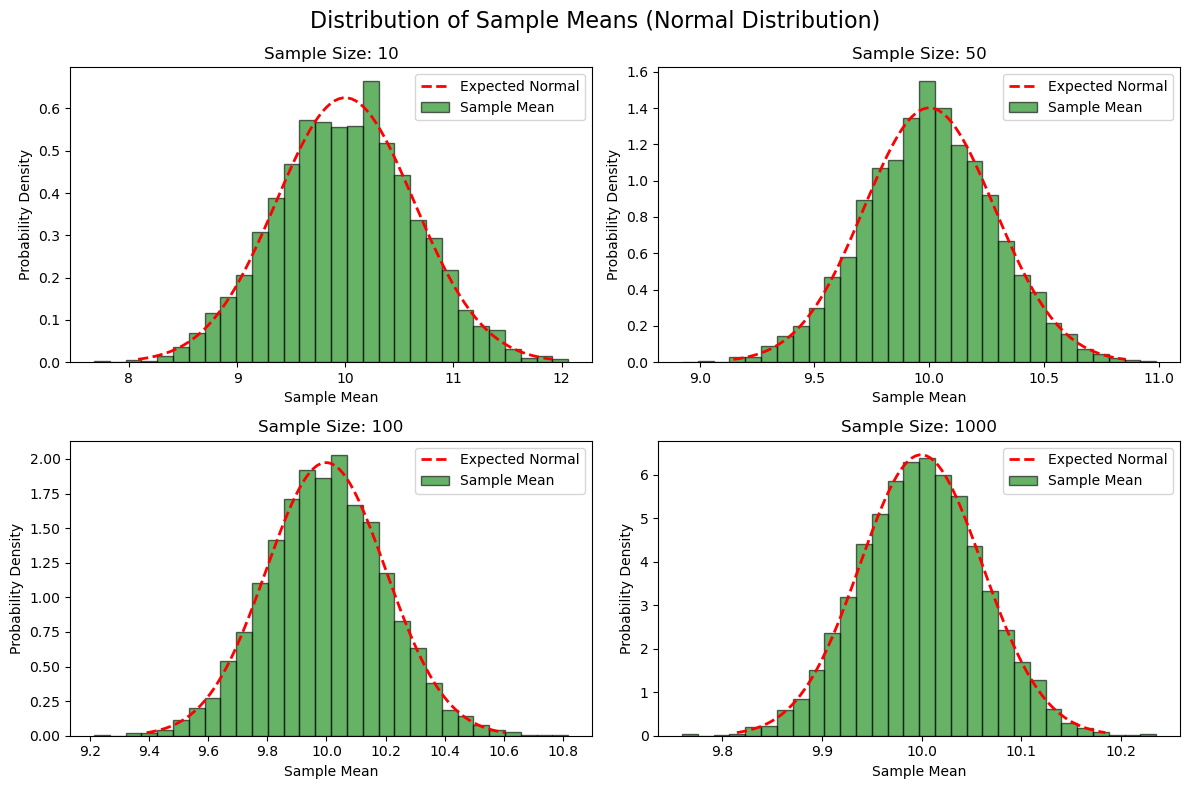

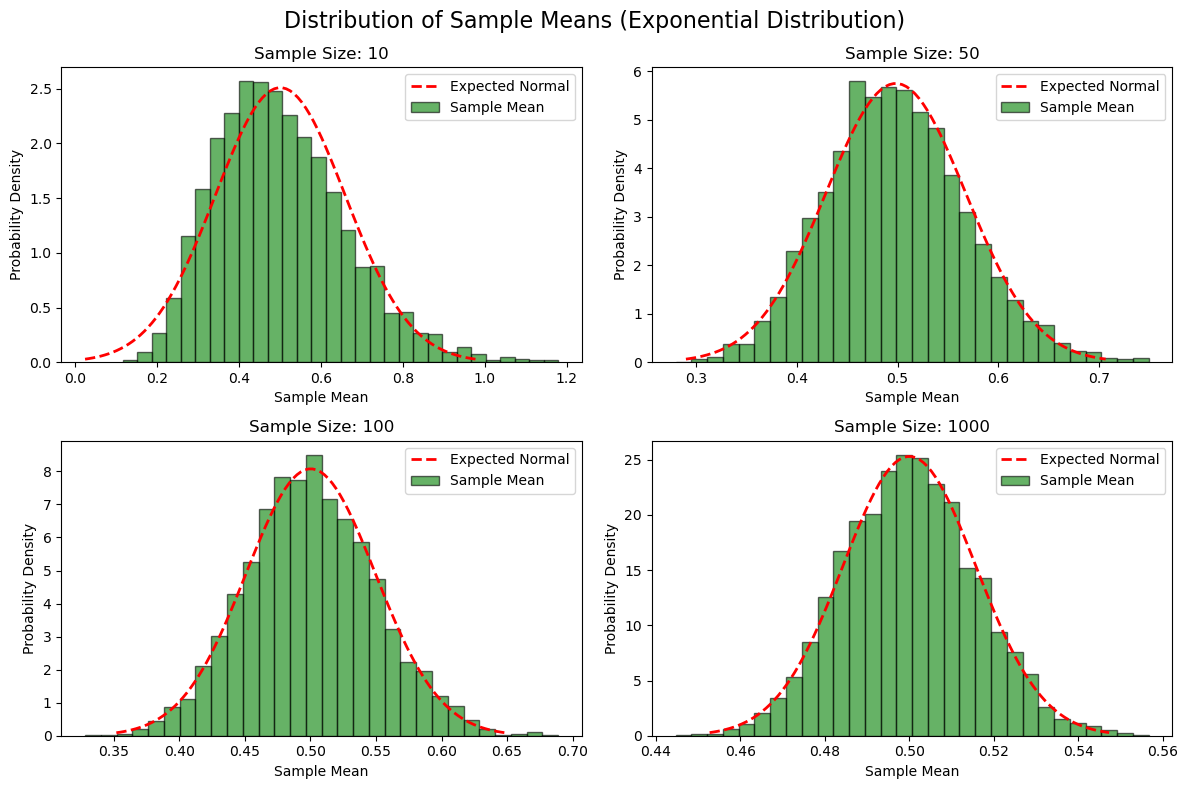

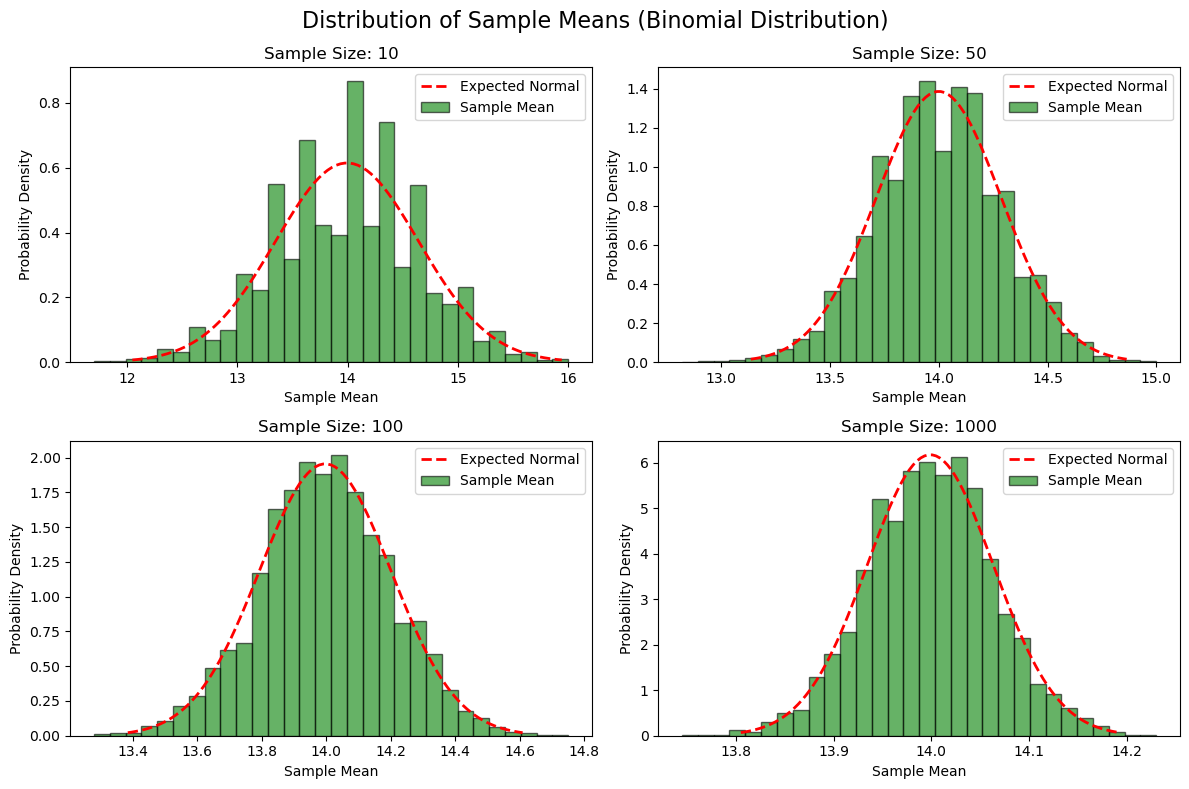

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom

np.random.seed(42)

#Set Parameters:
normal_mean = 10
normal_std = 2
exponential_lambda = 0.5
binomial_n = 20
binomial_p = 0.7

sample_sizes = [10, 50, 100, 1000]

num_samples = 5000

def generate_sample_means(distribution, params, sample_sizes):
    sample_means = []
    for n in sample_sizes:
        means = []
        for _ in range(num_samples):
            sample = distribution(*params, size=n)
            means.append(np.mean(sample))
        sample_means.append(means)
    return sample_means

# Function to plot histograms and overlay expected normal distributions
def plot_histograms(sample_means, distribution_name):
    plt.figure(figsize=(12, 8))
    for i, means in enumerate(sample_means):
        plt.subplot(2, 2, i+1)
        plt.hist(means, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
        plt.title(f'Sample Size: {sample_sizes[i]}')
        
        # Calculate expected normal distribution based on Central Limit Theorem
        mu = np.mean(means)
        sigma = np.std(means)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, norm.pdf(x, mu, sigma), color='r', linestyle='dashed', linewidth=2)
        plt.xlabel('Sample Mean')
        plt.ylabel('Probability Density')
        plt.legend(['Expected Normal', 'Sample Mean'])
    plt.suptitle(f'Distribution of Sample Means ({distribution_name} Distribution)', fontsize=16)
    plt.tight_layout()
    plt.show()

normal_sample_means = generate_sample_means(np.random.normal, (normal_mean, normal_std), sample_sizes)
exponential_sample_means = generate_sample_means(np.random.exponential, (exponential_lambda,), sample_sizes)
binomial_sample_means = generate_sample_means(np.random.binomial, (binomial_n, binomial_p), sample_sizes)

plot_histograms(normal_sample_means, 'Normal')
plot_histograms(exponential_sample_means, 'Exponential')
plot_histograms(binomial_sample_means, 'Binomial')



### Q2:Document your observations and insights from each experiment. Compare the distribution of sample means for each sample size and discuss how they align with the principles of the Central Limit Theorem. How does the sample size affect your plots in part 2(CLT)? What can you understand from these plots?

#### Exponential Distribution:

The exponential distribution is skewed to the right and has a long tail. According to the CLT, as the sample size increases, the distribution of sample means will tend towards a normal distribution, even if the population distribution is not normal.

When we observe the histograms for increasing sample sizes, we can see that for smaller sample sizes (e.g., 10), the distribution of sample means still retains some skewness, but as the sample size increases, the distribution becomes more symmetric and bell-shaped. The overlay of the expected normal distribution aligns better with the histograms for larger sample sizes, indicating convergence towards a normal distribution as predicted by the CLT.

#### Binomial Distribution:

The binomial distribution can be skewed depending on the parameters (n and p). For large sample sizes, the shape of the binomial distribution approaches a normal distribution due to the CLT.

Observing the histograms for increasing sample sizes, we notice that for smaller sample sizes (e.g., 10), the distribution of sample means may still exhibit some skewness, especially if the underlying binomial distribution is skewed. However, as the sample size increases, the distribution of sample means becomes more symmetric and bell-shaped. The overlay of the expected normal distribution aligns well with the histograms for larger sample sizes, indicating convergence towards a normal distribution as predicted by the CLT.

In all cases, as the sample size increases, the distribution of sample means tends to become more symmetric and bell-shaped, resembling a normal distribution. This aligns with the principles of the Central Limit Theorem, which states that regardless of the shape of the population distribution, the distribution of sample means will approximate a normal distribution as the sample size increases. This demonstrates the robustness and universality of the Central Limit Theorem across different types of distributions.

# Part 3: Hypothesis Testing

## 3-1: Unfair Coin

In [18]:
import numpy as np
import scipy.stats as stats

# Simulate an unfair coin with a bias of 10% more probable for one face
p_head = 0.55
p_tail = 0.45

# Define sample sizes
sample_sizes = [30, 100, 1000]

# Perform hypothesis testing for each sample size
for n in sample_sizes:
    # Generate n coin flips
    coin_flips = np.random.choice(['H', 'T'], size=n, p=[p_head, p_tail])
    
    # Calculate the proportion of heads
    p_hat = np.sum(coin_flips == 'H') / n
    
    # Calculate the standard error
    se = np.sqrt(p_hat * (1 - p_hat) / n)
    
    # Calculate the z-score
    z = (p_hat - 0.5) / se
    
    # Calculate the p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))
    
    # Set significance level
    alpha = 0.05
    
    # Make decision based on p-value
    if p_value < alpha:
        decision = "Reject null hypothesis (coin is unfair)"
    else:
        decision = "Fail to reject null hypothesis (coin is fair)"
    
    # Print results
    print(f"Sample size: {n}")
    print(f"Proportion of heads: {p_hat:.4f}")
    print(f"Z-score: {z:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Decision: {decision}\n")



Sample size: 30
Proportion of heads: 0.5333
Z-score: 0.3660
P-value: 0.7144
Decision: Fail to reject null hypothesis (coin is fair)

Sample size: 100
Proportion of heads: 0.5400
Z-score: 0.8026
P-value: 0.4222
Decision: Fail to reject null hypothesis (coin is fair)

Sample size: 1000
Proportion of heads: 0.5740
Z-score: 4.7323
P-value: 0.0000
Decision: Reject null hypothesis (coin is unfair)



### Q3:How does increasing the sample size affect your coin test?
As the sample size increases, the standard error decreases, resulting in a narrower confidence interval.
Additionally, larger sample sizes provide more power to detect small differences from the null hypothesis.

## 3-2&3: T-test, Job Placement

### Student's t-tests
A two-sample location test of the null hypothesis such that the means of two groups are equal. The variances of the two groups are assumed to be equal.
### Independent (unpaired) samples
The independent samples t-test is used when two separate sets of independent and identically distributed samples are obtained, and one variable from each of the two groups is compared.

In this case, we make a Hypothesis Test.\
The null hypothesis is that the means of placed students and not places students are equal.\
The alternative hypothesis is that the means of places students and not placed students are opposite.

Import dataset

In [20]:
import pandas as pd
job_placement = pd.read_csv('job_placement.csv')
job_placement

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
...,...,...,...,...,...,...,...,...,...,...,...
695,696,Lucas Taylor,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,697,Emma Martinez,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,698,Aiden Davis,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0
698,699,Mia Wilson,Female,23,Bachelor's,Electrical Engineering,University of Colorado--Boulder,Placed,66000,3.7,2.0


1. Split students into two groups based on their job placement status.

In [21]:
placed_students = job_placement[job_placement['placement_status'] == 'Placed']
notplaced_students = job_placement[job_placement['placement_status'] == 'Not Placed']

2. Calculate the t-statistic and degrees of freedom for these two groups.

degrees of freedom

In [22]:
df_placed = len(placed_students) - 1
df_notplaced = len(notplaced_students) - 1

total_df = df_placed + df_notplaced

print('Placed students degrees of freedom:', df_placed)
print('Not placed students degrees of freedom:', df_notplaced)
print('total number of degrees of freedom:', total_df)

Placed students degrees of freedom: 569
Not placed students degrees of freedom: 129
total number of degrees of freedom: 698


The t-statistic to test whether the means are different can be calculated as follows:\
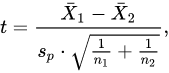\
where\
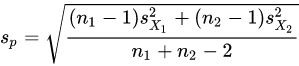\
is the pooled standard deviation of the two samples.

In [23]:
mean_placed = placed_students['gpa'].mean()
mean_notplaced = notplaced_students['gpa'].mean()

variance_placed = ((placed_students['gpa'] - mean_placed) ** 2).sum() / (len(placed_students) - 1)
variance_notplaced = ((notplaced_students['gpa'] - mean_notplaced) ** 2).sum() / (len(notplaced_students) - 1)

pooled_standard_deviation = ((df_placed * variance_placed + df_notplaced * variance_notplaced) / total_df) ** 0.5

t_statistic = (mean_placed - mean_notplaced) / pooled_standard_deviation / (1 / len(placed_students) + 1 / len(notplaced_students)) ** 0.5

print('t-statistic:', t_statistic)

t-statistic: 5.1053189564687536


3. Determine the p-value for the calculated t-statistic and degrees of freedom with the help of t-distribution. 

In [24]:
import numpy as np
from scipy.stats import t

p_value = 2 * t.sf(np.abs(t_statistic), total_df)
print('p-value:', p_value)

p-value: 4.263644494096813e-07


4. Report the result of the test and make decision.

Because the p-value is low, we say that it would be very unlikely that the grades of these two groups be equal, and hence reject null hypothesis.

5. Repeat this test, only use the SciPy library for performing the test.

In [25]:
from scipy import stats
stats.ttest_ind(placed_students['gpa'], notplaced_students['gpa'])

TtestResult(statistic=5.105318956468754, pvalue=4.263644494096789e-07, df=698.0)

As you can see, the results are exactly the same.

### Q4: What are t-statistic, degrees of freedom, and t-distribution in t-test? How can they help us to compare two data sets?

The t-statistic is a measure of the difference between two groups means. The t-statistic helps determine whether the difference between two samples means is statistically significant.
Degrees of freedom represent the number of independent pieces of information available for estimating a parameter. For a two-sample (independent) t-test, the degrees of freedom are calculated as df = n1 + n2 - 2, where n1 and n2 are the sample sizes from each group. Degrees of freedom play a crucial role in determining the shape of the t-distribution.
The t-distribution is a probability distribution that arises when we use the t-statistic to test hypotheses about population means. It is similar in shape to the normal (Gaussian) distribution but has heavier tails. As the sample size increases, the t-distribution approaches the standard normal distribution (z-distribution). When we perform a t-test, we compare the calculated t-statistic to critical values from the t-distribution. These critical values help us determine whether the observed difference is statistically significant. Thicker tails in the t-distribution (due to smaller sample sizes) make extreme t-values more likely, even under the null hypothesis.
These components help us compare two data sets by determining whether the difference between their means is statistically significant. The t-test compares the means of two groups and assumes a null hypothesis that the two means are equal. By calculating the t-statistic and comparing it to the critical value from the t-distribution, we can decide to reject or fail to reject the null hypothesis. This decision helps us understand whether the difference between the two data sets is likely due to chance or if it is a meaningful difference.

### Q5: What are the preliminary conditions for using t-test on our data?
For a two-sample t-test, you need two independent groups (samples) that are not related to each other. The t-test assumes that the data within each group (sample) follow a normal distribution. If the sample size is large (typically >30), the t-test is robust to deviations from normality. The variance of data in both groups should be approximately equal.

### Q6: Read about some other types of tests that are used in scientific research. Write a line about each of them.
#### Chi-square test:
This test is used to determine whether there is a significant association between two categorical variables. It is particularly useful when comparing the distribution of one variable across different levels of another variable.
#### ANOVA (Analysis of Variance):
ANOVA is used to compare the means of three or more groups. It determines whether there is a significant difference in the means of the groups, assuming equal variances. If the variances are not equal, a nonparametric test like the Kruskal-Wallis H test can be used.
#### Mann-Whitney U test:
This test is used to compare the means of two independent groups when the variances are not equal. It is a nonparametric alternative to the t-test.
#### Wilcoxon signed-rank test:
This test is used to compare the means of two related groups (paired data) when the variances are not equal. It is a nonparametric alternative to the paired t-test.
#### Kruskal-Wallis H test:
This test is used to compare the means of two or more independent groups when the variances are not equal. It is a nonparametric alternative to ANOVA.
#### Spearman's rho:
This test is used to measure the strength and direction of the relationship between two continuous variables. It is a nonparametric alternative to Pearson's correlation coefficient.